### This is analysis for data in a train view


This analysis is split into 2 parts, one gives you an html file that shows the train's journey on a specific date, along with the incidents that affected it and the corresponding delays. The second part assesses some stats (connected to reliability)  for that train service code for its year-based data.

**Parameters:**

inputs:

- `train origin and destination`
- `date`


outputs:

- `overall train journey`: what did the train encounter?

In [98]:
# Import required libraries for station_view function
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime, timedelta
import sys
import matplotlib.pyplot as plt
import geopandas as gpd
import json
import folium
from folium import plugins

# Ensure project root is in Python path
project_root = os.path.dirname(os.getcwd())  # Go up from demos to RDM_analysis
if project_root not in sys.path:
    sys.path.insert(0, project_root)

try:
    import importlib
    import outputs.utils
    importlib.reload(outputs.utils)  # ✅ Reload to pick up updated function with incident STANOX merging
    from outputs.utils import train_view, get_stanox_for_service, map_train_journey_with_incidents, train_view_2, plot_reliability_graphs
    print("✅ Successfully imported train analysis functions")
    print("✅ Updated: Now includes stations from incident results with delays")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("Make sure you're running from the RDM_analysis directory")
except Exception as e:
    print(f"❌ Error: {e}")


print("✅ Libraries imported successfully for train_view analysis")

station_view function ready!
plot_station_arrivals_violin() function ready!
plot_normal_operations_violin() function ready!
✅ Successfully imported train analysis functions
✅ Updated: Now includes stations from incident results with delays
✅ Libraries imported successfully for train_view analysis


Loading processed data

In [33]:
from outputs.load_data import load_processed_data

all_data = load_processed_data()

✅ Loaded 10,450,237 rows from 2599 files. Skipped 0.


just for quick access for columns

In [34]:
all_data.columns.tolist() # Display the columns of the combined DataFrame

['TRAIN_SERVICE_CODE',
 'PLANNED_ORIGIN_LOCATION_CODE',
 'PLANNED_ORIGIN_GBTT_DATETIME',
 'PLANNED_DEST_LOCATION_CODE',
 'PLANNED_DEST_GBTT_DATETIME',
 'PLANNED_CALLS',
 'ACTUAL_CALLS',
 'PFPI_MINUTES',
 'INCIDENT_REASON',
 'INCIDENT_NUMBER',
 'EVENT_TYPE',
 'SECTION_CODE',
 'DELAY_DAY',
 'EVENT_DATETIME',
 'INCIDENT_START_DATETIME',
 'ENGLISH_DAY_TYPE',
 'STATION_ROLE',
 'DFT_CATEGORY',
 'PLATFORM_COUNT',
 'DATASET_TYPE',
 'WEEKDAY',
 'STANOX',
 'DAY']

### OD pair + DATE

In [94]:
date_str = '13-JUN-2024'
origin = '11231'
destination = '32530'
result_1 = train_view(all_data, origin, destination, date_str)
result_2 = train_view(all_data, destination, origin, date_str)

 Train journeys between 11231 and 32530: 11933 records found.
Unique train service codes: ['12357820']
 6 incident(s) found for OD pair 11231_32530 on 13-JUN-2024:


,TRAIN_SERVICE_CODE,PLANNED_ORIGIN_LOCATION_CODE,PLANNED_ORIGIN_GBTT_DATETIME,PLANNED_DEST_LOCATION_CODE,PLANNED_DEST_GBTT_DATETIME,PLANNED_CALLS,ACTUAL_CALLS,PFPI_MINUTES,INCIDENT_REASON,INCIDENT_NUMBER,...,EVENT_DATETIME,INCIDENT_START_DATETIME,ENGLISH_DAY_TYPE,STATION_ROLE,DFT_CATEGORY,PLATFORM_COUNT,DATASET_TYPE,WEEKDAY,STANOX,DAY
1498005,12357820,11231,0458,32530,0715,0651,0653,1.5,TZ,550356.0,...,13-JUN-2024 06:53,2024-06-13 05:45:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,31521,TH
1498006,12357820,11231,0458,32530,0715,0651,0653,1.5,Q1,550356.0,...,13-JUN-2024 06:53,2024-06-13 05:45:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,31521,TH
1500128,12357820,11231,0848,32530,1115,1057,1103,6.0,TZ,550405.0,...,13-JUN-2024 11:03,2024-06-13 06:00:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,31521,TH
1501319,12357820,11231,1151,32530,1415,1400,1403,3.0,TA,551212.0,...,13-JUN-2024 14:03,2024-06-13 12:04:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,31521,TH
1501341,12357820,11231,1151,32530,1415,1405,1408,3.0,R7,551525.0,...,13-JUN-2024 14:08,2024-06-13 14:02:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,31521,TH
1555381,12357820,11231,1151,32530,1415,1400,1403,3.0,TA,551212.0,...,13-JUN-2024 14:03,2024-06-13 12:04:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,31620,TH


 Train journeys between 32530 and 11231: 17626 records found.
Unique train service codes: ['12357820']
 10 incident(s) found for OD pair 32530_11231 on 13-JUN-2024:


,TRAIN_SERVICE_CODE,PLANNED_ORIGIN_LOCATION_CODE,PLANNED_ORIGIN_GBTT_DATETIME,PLANNED_DEST_LOCATION_CODE,PLANNED_DEST_GBTT_DATETIME,PLANNED_CALLS,ACTUAL_CALLS,PFPI_MINUTES,INCIDENT_REASON,INCIDENT_NUMBER,...,EVENT_DATETIME,INCIDENT_START_DATETIME,ENGLISH_DAY_TYPE,STATION_ROLE,DFT_CATEGORY,PLATFORM_COUNT,DATASET_TYPE,WEEKDAY,STANOX,DAY
27940,12357820,32530,1029,11231,1302,1202,1205,3.0,VH,551271.0,...,13-JUN-2024 12:05,2024-06-13 12:02:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,11720,TH
29857,12357820,32530,1329,11231,1605,1503,1508,5.0,XA,551377.0,...,13-JUN-2024 15:08,2024-06-13 13:05:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,11720,TH
1234961,12357820,32530,0529,11231,0755,0701,0710,9.0,M8,550428.0,...,13-JUN-2024 07:10,2024-06-13 06:19:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,30120,TH
1240227,12357820,32530,1229,11231,1505,1346,1349,3.0,JL,550229.0,...,13-JUN-2024 13:49,2024-06-13 03:18:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,30120,TH
1497853,12357820,32530,0529,11231,0755,0633,0636,3.0,TZ,550405.0,...,13-JUN-2024 06:36,2024-06-13 06:00:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,31521,TH
1551608,12357820,32530,0529,11231,0755,0633,0636,3.0,TZ,550405.0,...,13-JUN-2024 06:36,2024-06-13 06:00:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,31620,TH
1845236,12357820,32530,1829,11231,2053,1831,1837,6.0,RC,552298.0,...,13-JUN-2024 18:37,2024-06-13 18:26:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,32530,TH
2030479,12357820,32530,0529,11231,0755,0552,0619,27.0,TZ,550405.0,...,13-JUN-2024 06:19,2024-06-13 06:00:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,33087,TH
2030898,12357820,32530,0729,11231,0953,0754,0803,9.0,TH,551532.0,...,13-JUN-2024 08:03,2024-06-13 14:08:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,33087,TH
2080609,12357820,32530,1229,11231,1505,1339,1341,2.0,JL,550229.0,...,13-JUN-2024 13:41,2024-06-13 03:18:00,[TH],None,NaN,NaN,SINGLE_DAY,TH,35136,TH


In [95]:
service_code = '12357820'
service_stanox = get_stanox_for_service(all_data, service_code, origin, destination, date_str=date_str)

m = map_train_journey_with_incidents(
    all_data,
    service_stanox,
    incident_results=[result_1, result_2]
    ,service_code=service_code,
    date_str=date_str
)

m.save(f"train_view_{service_code}_{origin}_{destination}_{date_str}.html")

✅ Filtered to date: 13-JUN-2024
✅ Retrieved ALL stations for service 12357820 on OD pair 11231_32530
   Total unique stations: 4
   Stations: ['31521', '31620', '11231', '32530']
📍 Found 7 additional stations from incident results with delays
📊 Total unique stations: 8
   - From service: 4
   - From incidents: 7
   - Combined: 8
📍 Found 8 stations with coordinates
   1. Lancaster (11720)
   2. Wigan North Western (35136)
   3. Manchester Airport (32530)
   4. Barrow-In-Furness (11231)
   5. Manchester Oxford Road (33087)
   ... and 3 more
🔗 Computing route connections based on geographic proximity...
   ✅ Created 7 route connections based on minimum spanning tree
📍 Creating incident markers for 9 sections...
✅ Created 8 incident markers on map
✅ Map created with proximity-based connections!


### Stats for this train service code (not date dependent)

**Updated:** Both `train_view_2()` and `plot_reliability_graphs()` now analyze ALL stations:
- Stations from the service route (`get_stanox_for_service`)
- Additional stations that experienced delays for this service code
- Complete reliability metrics across the entire affected network

📍 Found 9 additional stations with delays for service 12357820
📊 Total unique stations for analysis: 10
   - From service route: 4
   - With delays: 9
   - Combined: 10
📍 Found 9 additional stations with delays for plotting
📊 Plotting delay distributions for 10 stations


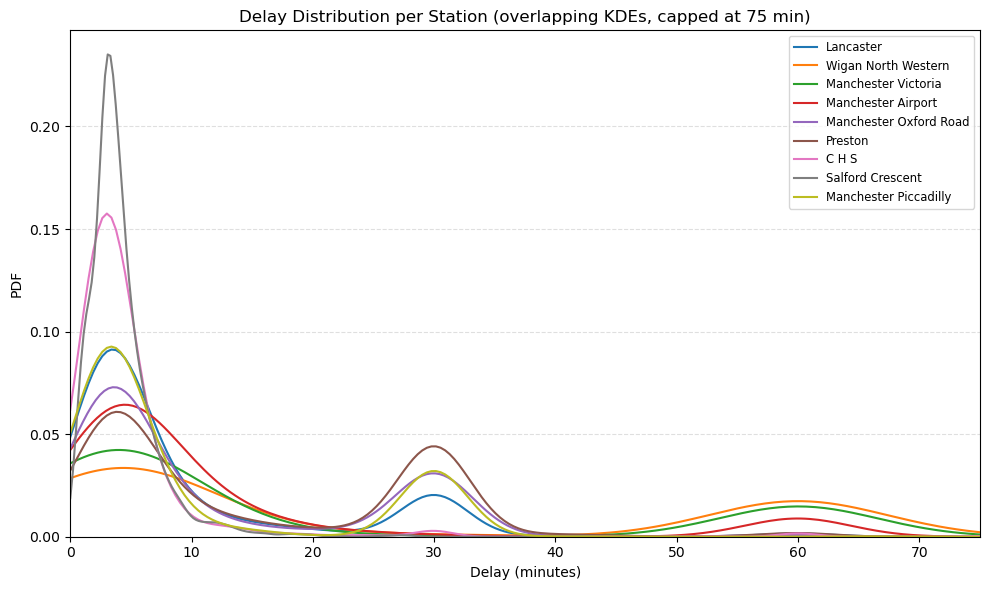

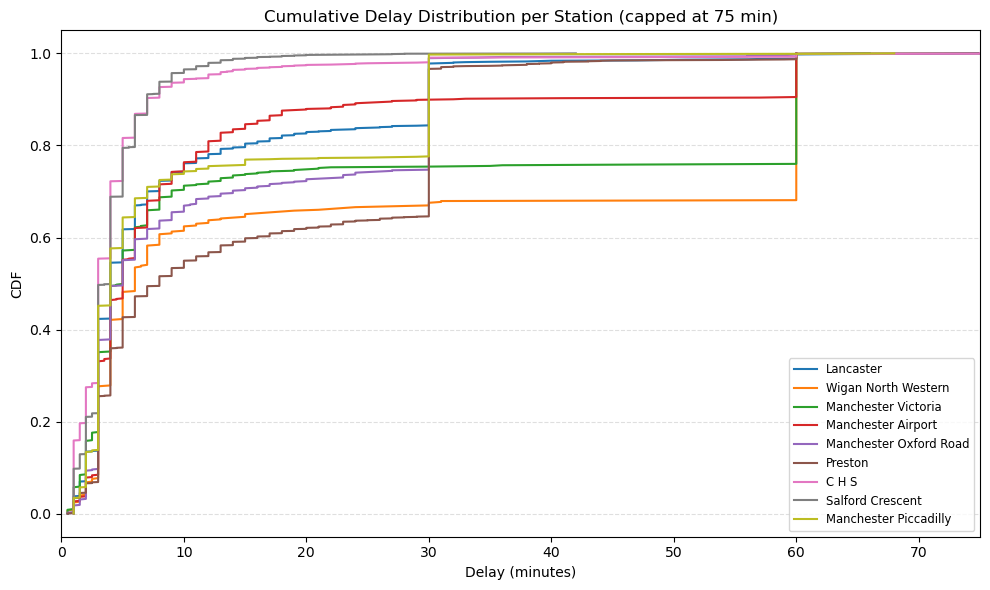

In [99]:
result_table = train_view_2(all_data, service_stanox, service_code)

result_table

plot_reliability_graphs(all_data, service_stanox, service_code) # service_stanox is the list of stations for this service code